In [1]:
!pip install pmdarima

   ---------------------------------------- 0.0/615.0 kB ? eta -:--:--
    --------------------------------------- 10.2/615.0 kB ? eta -:--:--
   -- ------------------------------------ 41.0/615.0 kB 667.8 kB/s eta 0:00:01
   --------------- ------------------------ 235.5/615.0 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------  614.4/615.0 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 615.0/615.0 kB 3.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [6]:
dataset = pd.read_csv('C:/Users/Jardi/Documents/Cursos/Machine Learning/recursos do curso/Bases de dados/AirPassengers.csv')

In [7]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
dataset = pd.read_csv('C:/Users/Jardi/Documents/Cursos/Machine Learning/recursos do curso/Bases de dados/AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_parser = dateparse)

C:\Users\Jardi\AppData\Local\Temp\ipykernel_20428\3801717682.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [10]:
dataset

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [11]:
dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
time_series = dataset['#Passengers']

In [13]:
time_series

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [14]:
time_series[1]

118

In [15]:
time_series['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [16]:
time_series[datetime(1949,2,1)]

118

In [17]:
time_series['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [18]:
time_series[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [19]:
time_series['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [20]:
time_series.index.max()

Timestamp('1960-12-01 00:00:00')

In [21]:
time_series.index.min()

Timestamp('1949-01-01 00:00:00')

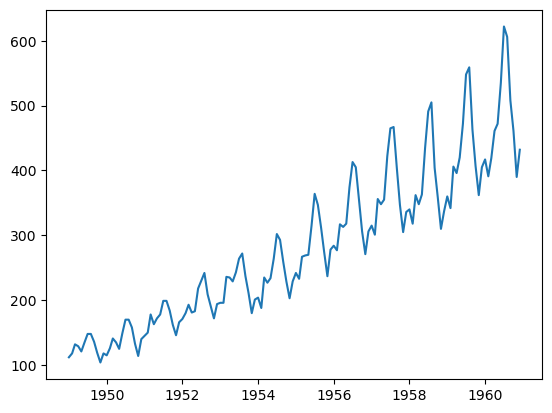

In [22]:
plt.plot(time_series)

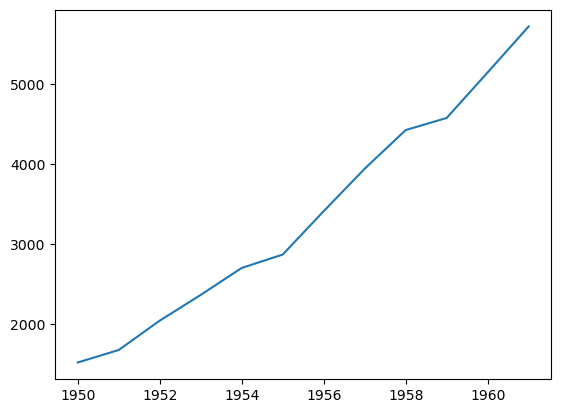

In [23]:
time_series_ano = time_series.resample('A').sum()
plt.plot(time_series_ano)

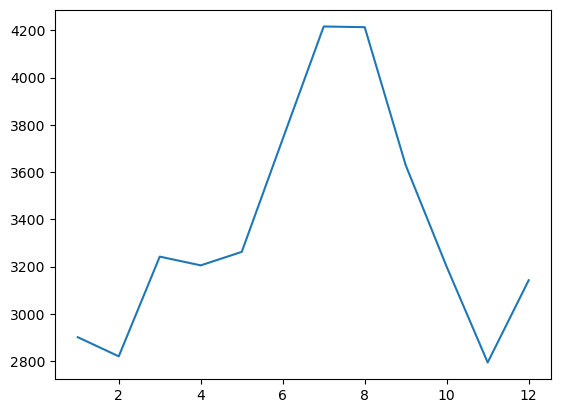

In [24]:
time_series_mes = time_series.groupby([lambda x: x.month]).sum()
plt.plot(time_series_mes)

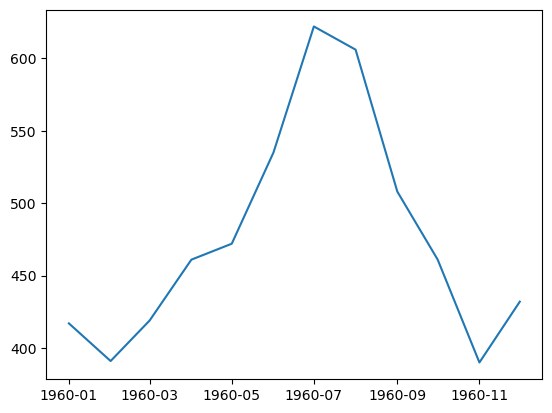

In [25]:
time_series_datas = time_series['1960-01-01':'1960-12-01']
plt.plot(time_series_datas)

In [26]:
decomposicao = seasonal_decompose(time_series)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

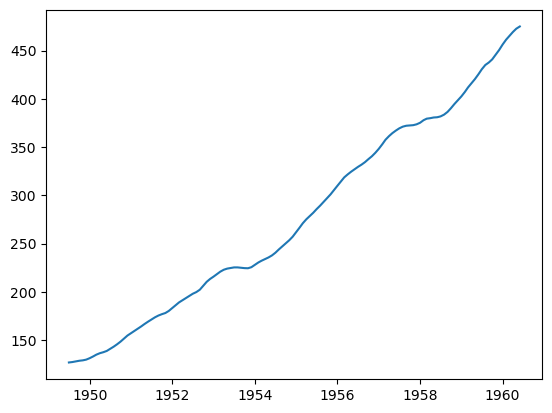

In [27]:
plt.plot(tendencia)

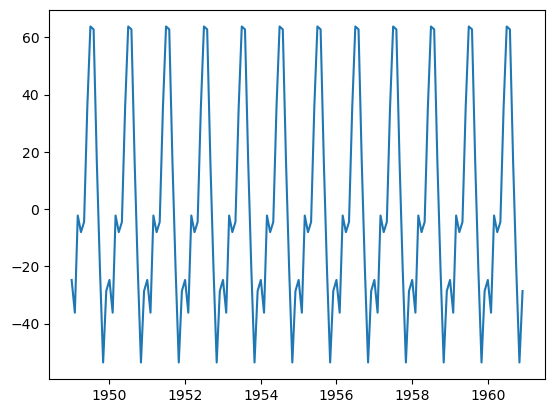

In [28]:
plt.plot(sazonal)

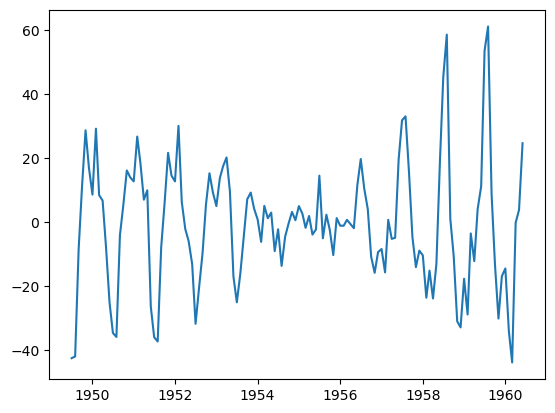

In [30]:
plt.plot(aleatorio)

In [34]:
# Parâmetors P, Q e D
model = auto_arima(time_series,order=(2,1,2))

In [36]:
model.order

(4, 1, 3)

In [37]:
predictions = model.predict(n_periods=24)

In [38]:
predictions

1961-01-01    467.573921
1961-02-01    490.494800
1961-03-01    509.137183
1961-04-01    492.554956
1961-05-01    495.306041
1961-06-01    475.947797
1961-07-01    476.339808
1961-08-01    475.552121
1961-09-01    472.353871
1961-10-01    483.889755
1961-11-01    475.570307
1961-12-01    485.921653
1962-01-01    479.133722
1962-02-01    480.987523
1962-03-01    482.221464
1962-04-01    476.211101
1962-05-01    483.942884
1962-06-01    475.847436
1962-07-01    482.794348
1962-08-01    479.012044
1962-09-01    479.518734
1962-10-01    482.449533
1962-11-01    476.974038
1962-12-01    483.511105
Freq: MS, dtype: float64

In [39]:
len(time_series)

144

In [40]:
train = time_series[:130]
train.shape

(130,)

In [41]:
train.index.min(), train.index.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1959-10-01 00:00:00'))

In [42]:
test = time_series[130:]
test.shape

(14,)

In [43]:
test.index.min(), test.index.max()

(Timestamp('1959-11-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [44]:
model2 = auto_arima(train, suppress_warnings=True)

In [45]:
test.index

DatetimeIndex(['1959-11-01', '1959-12-01', '1960-01-01', '1960-02-01',
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [46]:
prediction = pd.DataFrame(model2.predict(n_periods=14), index=test.index)
prediction.columns = ['passengers_predictions']
prediction

,passengers_predictions
Month,
1959-11-01,357.690517
1959-12-01,334.857460
1960-01-01,342.488603
1960-02-01,375.944538
1960-03-01,424.126289
1960-04-01,473.151440
1960-05-01,510.388372
1960-06-01,527.724234
1960-07-01,523.268322


In [47]:
test

Month
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

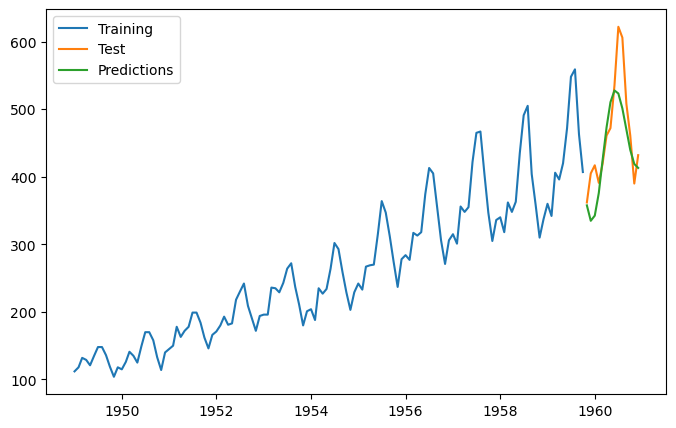

In [48]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Predictions')
plt.legend();